# CVL100C2: Assignment - 1

* Anirudha Kulkarni

* 2019CS50421

### Objectives:

* Estimate AQI for each month using Data from Anand Vihar CPCB station.

* Analyse the calculated values for trends and interpretate the data using graphs

### Details:

- Period: 1st January -31st December 2019
- Pollutants: PM2.5, PM10, SO2 and NO2
- Station : Anand Vihar
- CPCB data Source: https://app.cpcbccr.com/ccr/#/caaqm-dashboard-all/caaqmlanding/data
- Seasons: Winter (December to February), Pre-monsoon (March to May), Monsoon (June to August) and Post-monsoon (September to November)


---



## Approach:

Data is analysed in few steps.

Program is written in python. Modules like `pandas` , `numpy`  are used for data handeling and `matplotlib` for data visualisation.

### 1. Import database:

Database is loaded from csv file and cleared from `None` values by dropping them as they are few in number. Appropriate headings for the columns are added and data type of each cell is adjusted to make handeling data easier.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import datetime

df = pd.read_excel (r'./A1_G4.xlsx')
df=df.iloc[16:, 0:6]
df.drop(df.columns[1],axis=1,inplace=True)
df=df.mask(df.eq('None')).dropna()
df.columns=['Date','PM2.5','PM10','NO2','SO2']
df['Date']=pd.to_datetime(df['Date'])
df.reset_index(drop=True, inplace=True)
df=df.astype({'PM2.5':float,'PM10':float,'NO2':float,'SO2':float})
df

Date   PM2.5    PM10     NO2    SO2
0   2019-01-01  380.23  555.57  146.50  15.56
1   2019-02-01  418.47  622.37  132.76  14.59
2   2019-03-01  412.89  570.40  134.30   9.99
3   2019-04-01  291.95  431.19  107.19   5.81
4   2019-05-01  241.67  343.16   85.87   6.63
..         ...     ...     ...     ...    ...
347 2019-12-27  292.34  426.05  246.23   9.09
348 2019-12-28  336.75  500.48  331.13  12.24
349 2019-12-29  359.65  517.02  215.10  11.83
350 2019-12-30  369.66  500.67   63.66   8.56
351 2019-12-31  290.57  331.31   45.47  12.59

[352 rows x 5 columns]

### 2. Calculating AQI:

AQI is calculated using Indian calculation method, i.e. max operator.

**_Formula:_**

For each pollutant we calculate Ip by using

![](image/Sample/1615483520877.png)

where, ![](image/Sample/1615483577831.png)

And final AQI is taken as max of all the pollutants Ip as per indian calculation method.

**Note: AQI is bounded by 500 as maximum value by Severe indication**


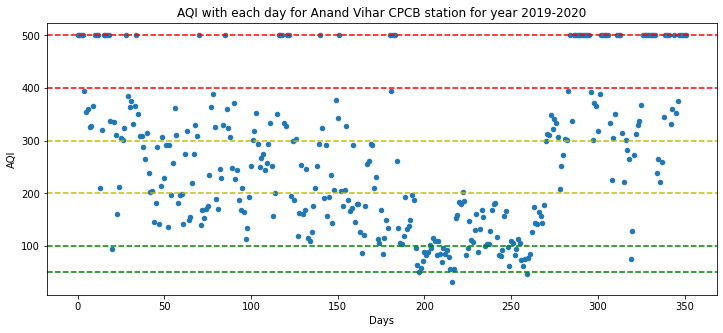

In [2]:
aqiRange = [[0,50],[51,100],[101,200],[201,300],[301,400],[400,500]] #AQI RANGE
pollutants=['PM2.5','PM10','NO2','SO2'] #POLLUTANTS LIST
breakpoints=[[[0,30],[31,60],[61,90],[91,120],[121,250],[250,987654321]],[[0,50],[51,100],[101,250],[251,350],[351,430],[430,987654321]],[[0,40],[41,80],[81,180],[181,280],[281,400],[400,987654321]],[[0,40],[41,80],[81,380],[381,800],[801,1600],[1600,987654321]]]
aqiCalculated=[]
I_P_PM2_5=[]
I_P_PM10=[]
I_P_NO2=[]
I_P_SO2=[]
for i in range (len(df)):
    I_P_array=[]
    for pollute in pollutants:
        C_P=df[pollute][i]
        if pollute=='PM2.5':breakpoint=breakpoints[0]
        if pollute=='PM10':breakpoint=breakpoints[1]
        if pollute=='NO2':breakpoint=breakpoints[2]
        if pollute=='SO2':breakpoint=breakpoints[3]
        for j in range(len(breakpoint)):
            if (C_P<=breakpoint[j][1]):
                B_LO=breakpoint[j][0]
                B_HI=breakpoint[j][1]
                I_LO=aqiRange[j][0]
                I_HI=aqiRange[j][1]
                break
        if(B_HI==987654321):
            I_P_array+=[500]
        else:
            I_P_array+=[((I_HI-I_LO)*(C_P-B_LO)/(B_HI-B_LO))+I_LO]
#         print(I_P_array)
    I_P_PM2_5+=[I_P_array[0]]
    I_P_PM10+=[I_P_array[1]]
    I_P_NO2+=[I_P_array[2]]
    I_P_SO2+=[I_P_array[3]]
    aqiCalculated+=[max(I_P_array)]
df['IP PM2.5']=I_P_PM2_5
df['IP PM10']=I_P_PM10
df['IP NO2']=I_P_NO2
df['IP SO2']=I_P_SO2
df['AQI']=aqiCalculated
plotted=df.reset_index()
plotted.plot(x='index',y='AQI', kind="scatter")
plt.xlabel('Days')
plt.title('AQI with each day for Anand Vihar CPCB station for year 2019-2020')
plt.axhline(y=50, color='g', linestyle='--')
plt.axhline(y=100, color='g', linestyle='--')
plt.axhline(y=200, color='y', linestyle='--')
plt.axhline(y=300, color='y', linestyle='--')
plt.axhline(y=400, color='r', linestyle='--')
plt.axhline(y=500, color='r', linestyle='--')
fig = plt.gcf()
fig.set_size_inches(12, 5)
plt.show()

### 3. Tagging data:

Each record in database is tagged with corresponding AQI indication corresponding to AQI value as calculated in step 3.


In [3]:
df.insert(9,'AQI_label', pd.cut(x=df['AQI'], bins=[0.0, 50.0, 100.0, 200.0, 300.0, 400.0,500.0], 
                    labels=['Good','Satsifactory','Moderate','Poor','Very poor','Severe'])) 



### 4. Plotting graphs:

Following graphs are plotted to get easier visualization of data

1. Monthwise distribution
2. Quality wise distribution

#### 4.1 Monthwise distribution:

Monthwise AQI is calculated from daily AQI calculation. Values are also stored in `MonthwiseAQI.csv` file to check

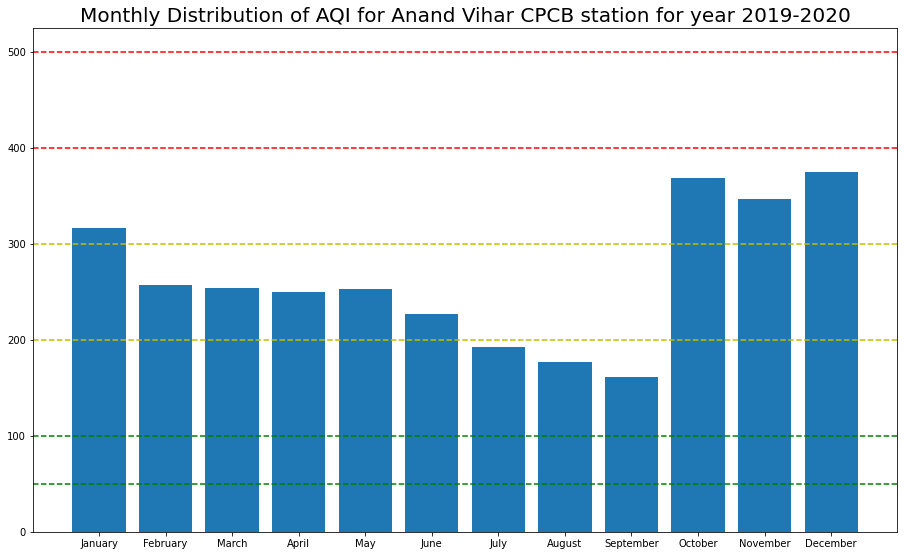

In [4]:
result = df.groupby([ df['Date'].dt.month]).agg(np.mean)
result['Month']=['January','February','March','April','May','June','July','August','September','October','November','December']
fig = plt.figure()

fig.set_figwidth(12) 
fig.set_figheight(7) 
ax = fig.add_axes([0,0,1,1])
plt.axhline(y=50, color='g', linestyle='--')
plt.axhline(y=100, color='g', linestyle='--')
plt.axhline(y=200, color='y', linestyle='--')
plt.axhline(y=300, color='y', linestyle='--')
plt.axhline(y=400, color='r', linestyle='--')
plt.axhline(y=500, color='r', linestyle='--')
ax.bar(result['Month'],result['AQI'],)
plt.title('Monthly Distribution of AQI for Anand Vihar CPCB station for year 2019-2020', fontsize=20)

f = open("MonthwiseAQI.csv", "a")
f.write("AQI\n")
for i in result['AQI']:
    f.write(str(i)+"\n")
f.close()





#### 4.2 Quality wise Distribution:

Pie chart to indicate percentage of AQI indication and corresponding days percentage

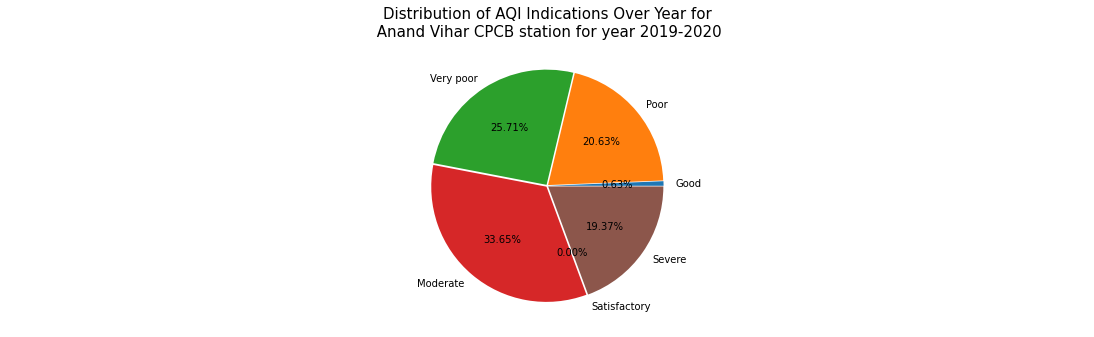

In [5]:
df.dtypes
categories=['Good','Satisfactory','Moderate','Poor','Very poor','Severe']
df['AQI_label']=pd.Categorical(
   df['AQI_label'], categories=categories, ordered=True)
a=df['AQI_label'].value_counts()
values=['Good','Poor','Very poor','Moderate','Satisfactory','Severe']
numbers=[a['Good'],a['Poor'],a['Very poor'],a['Moderate'],a['Satisfactory'],a['Severe']]
fig = plt.figure()
fig.set_figwidth(15) 
fig.set_figheight(4) 
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(numbers,explode=(0.01,0.01,0.01,0.01,0.01,0.01), labels = values,autopct='%2.2f%%')
plt.title('Distribution of AQI Indications Over Year for\n Anand Vihar CPCB station for year 2019-2020',fontsize=15)
plt.show()

#### Interpretations:
There is relatively steady trend till June which drops slightly till september and rises drastically in october.

* Farm fires contributes the most to the october serge in pollution levels. Burning paddy stubbles have been an easy way to get rid and at low cost for several years. With the use of combine harvesters, the practice became more common as the harvester leaves behind tall stalks, which have to be removed before replanting. The paddy straw and stalks have high silica content and are not used to feed livestock. Hence, the easiest way is to get rid of it by seetting it on fire. ref: https://www.downtoearth.org.in/news/air/-what-other-option-do-we-have-why-stubble-fires-would-not-die-74174

* October also marks Diwali festival which comes with heavy firecrackers despite many restrictions. The air quality detorates severly for few weeks after the festival and represents the sudden surge in October month.
ref: https://www.downtoearth.org.in/news/air/air-quality-in-delhi-further-deteriorates-post-diwali-breaches-emergency-mark-for-a-time-74243

* November, Decemeber marks winter in the region which sustains the October pollution level. Temperature drops till 2-3 degree celsius. Particulate matter and carbon monoxide pollutants from wood burning increases during the cold winter months. Idling cars to defrost or keep them warm increases the amount of air pollution as well.

* October usually marks the withdrawal of monsoons in Northwest India. During monsoons, the prevalent direction of wind is easterly. These winds, which travel from over the Bay of Bengal, carry moisture and bring rains to this part of the country. This causes increases humidity and combination with vehicles' exhaust causes AQI to go up again


Anand Vihar lies in heavily polluted area thanks to the reasons mentioned above, mostly due to stubble burning, factories and exhaust by vehicles. Less than 1% of time, the AQI is just satisfactory. Nearly 20% of the time its Severe and is hazardous. There is sudden surge in lungs cancer rates. 3 out of 10 lung cancer patients are non smokers. This can be seen as effect to mostly unhealthy AQI conditions in the region.


## References:
1. https://www.downtoearth.org.in/news/air/-what-other-option-do-we-have-why-stubble-fires-would-not-die-74174
2. https://www.downtoearth.org.in/news/air/air-quality-in-delhi-further-deteriorates-post-diwali-breaches-emergency-mark-for-a-time-74243
3. https://time.com/5718012/new-delhi-pollution-2019/